## CIFAR-10 CNN Image Classification - Baseline
The problem of automatically classifying photographs of objects is difficult because of the near infinite number of permutations of objects, positions, lighting and so on. A standard computer vision and deep learning dataset for this problem was developed by the Canadian Institute for Advanced Research (CIFAR).

The CIFAR-10 dataset consists of 60,000 photos divided into 10 classes. Classes include common objects such as airplanes, automobiles, birds, cats and so on. The dataset is split in a standard way, where 50,000 images are used for training a model and the remaining 10,000 for evaluating its performance. The photos are in color with red, green and blue components, but are small measuring 32 by 32 pixel squares. 

State-of-the-art models have achieved 96% classification accuracy, with very good performance considered above 90% and human performance on the problem is at 94%. This is my attempt to use a relatively small convnet along with data augmentation to achieve good results; hopefully.

In [1]:
# imports
import numpy as np
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from PIL import Image as im
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
# set random seed
seed = 7
np.random.seed(seed)

In [3]:
# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()  

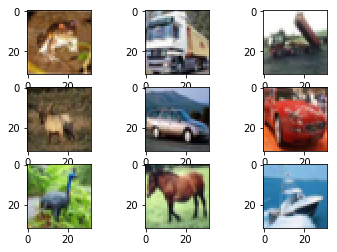

In [4]:
# check out images
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(im.fromarray(X_train[i], 'RGB'))
plt.show()

## Baseline Model

In [5]:
# normalize the data inputs from 0-255 to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [6]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
# one-hot encode the output vectors to convert them from a class number 
# to a binary matrix representation of class number
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
# validate OH encoding
print("Training output shape:", y_train.shape)
print("Test output shape:", y_test.shape)
print(y_test[3])

Training output shape: (50000, 10)
Test output shape: (10000, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
# define the CNN model
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), data_format="channels_last", activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))    
    return model    

In [10]:
# create the cnn model
model = cnn_model()
nb_epochs = 100
lrate = 0.01
decay = lrate / nb_epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
__________

In [11]:
# fit the model
batch_size = 64
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epochs, validation_data=(X_test, y_test)).history

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 314s 6ms/step - loss: 1.8873 - acc: 0.3113 - val_loss: 1.5390 - val_acc: 0.4432
Epoch 2/100
50000/50000 [==============================] - 324s 6ms/step - loss: 1.4574 - acc: 0.4730 - val_loss: 1.4043 - val_acc: 0.5092
Epoch 3/100
50000/50000 [==============================] - 309s 6ms/step - loss: 1.2830 - acc: 0.5391 - val_loss: 1.2099 - val_acc: 0.5676
Epoch 4/100
50000/50000 [==============================] - 313s 6ms/step - loss: 1.1381 - acc: 0.5908 - val_loss: 1.1104 - val_acc: 0.6033
Epoch 5/100
50000/50000 [==============================] - 311s 6ms/step - loss: 1.0196 - acc: 0.6368 - val_loss: 0.9522 - val_acc: 0.6650
Epoch 6/100
50000/50000 [==============================] - 382s 8ms/step - loss: 0.9133 - acc: 0.6778 - val_loss: 0.9082 - val_acc: 0.6834
Epoch 7/100
50000/50000 [==============================] - 432s 9ms/step - loss: 0.8174 - acc: 0.7119 - val_loss: 0.

In [12]:
# evaluate model
score = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

10000/10000 [==============================] - 18s 2ms/step
Accuracy: 81.81%


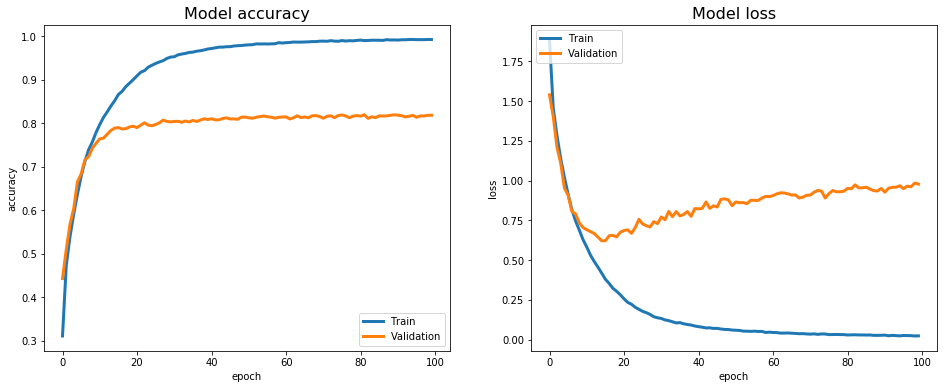

In [13]:
# plot the model loss and accuracy
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# summarize history for accuracy
axis1.plot(history['acc'], label='Train', linewidth=3)
axis1.plot(history['val_acc'], label='Validation', linewidth=3)
axis1.set_title('Model accuracy', fontsize=16)
axis1.set_ylabel('accuracy')
axis1.set_xlabel('epoch')
axis1.legend(loc='lower right')

# summarize history for loss
axis2.plot(history['loss'], label='Train', linewidth=3)
axis2.plot(history['val_loss'], label='Validation', linewidth=3)
axis2.set_title('Model loss', fontsize=16)
axis2.set_ylabel('loss')
axis2.set_xlabel('epoch')
axis2.legend(loc='upper left')
plt.show()